### Import du dataset **Orders** afin de le transformer en Data_Frame

In [36]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

orders_df = pd.read_csv('Data/orders_dataset.csv')
customers_df = pd.read_csv('Data/customers_dataset.csv')
geolocation_df = pd.read_csv('Data/geolocation_dataset.csv')
order_items_df = pd.read_csv('Data/order_items_dataset.csv')
payments_df = pd.read_csv('Data/order_payments_dataset.csv')
review_df = pd.read_csv('Data/order_review_dataset_clean.csv')
products_df = pd.read_csv('Data/products_dataset.csv')
sellers_df = pd.read_csv('Data/sellers_dataset.csv')
states_df = pd.read_csv('Data/state_name.csv')



In [12]:
# Multi Join pour analyser le nombre de vente  en fonction des catégories de produits.

orders_order_items_product = orders_df.merge(order_items_df, on="order_id", how="inner").merge(products_df, on="product_id", how="inner")
orders_order_items_product
orders_order_items_product.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [40]:
# 
df1 = orders_order_items_product["product_category_name"].value_counts().reset_index()
df1.head(20)


,product_category_name,count
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


Text(0.5, 1.0, 'Le nombre de vente par catégorie de produit')

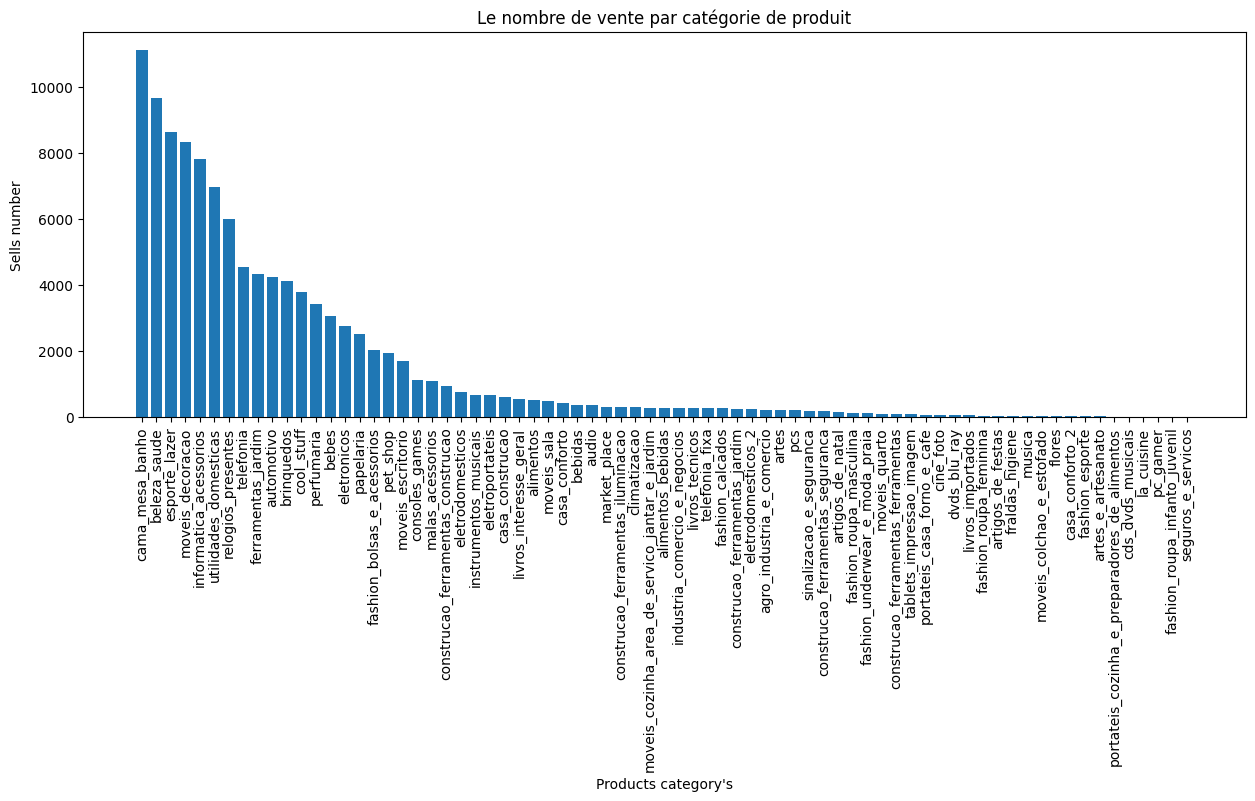

In [37]:
plt.figure(figsize = (15, 5))
plt.bar(df1["product_category_name"],df1["count"])
plt.xticks(rotation='vertical')
plt.xlabel("Products category's")
plt.ylabel("Sells number")
plt.title("Le nombre de vente par catégorie de produit")

(0.0, 16.0)

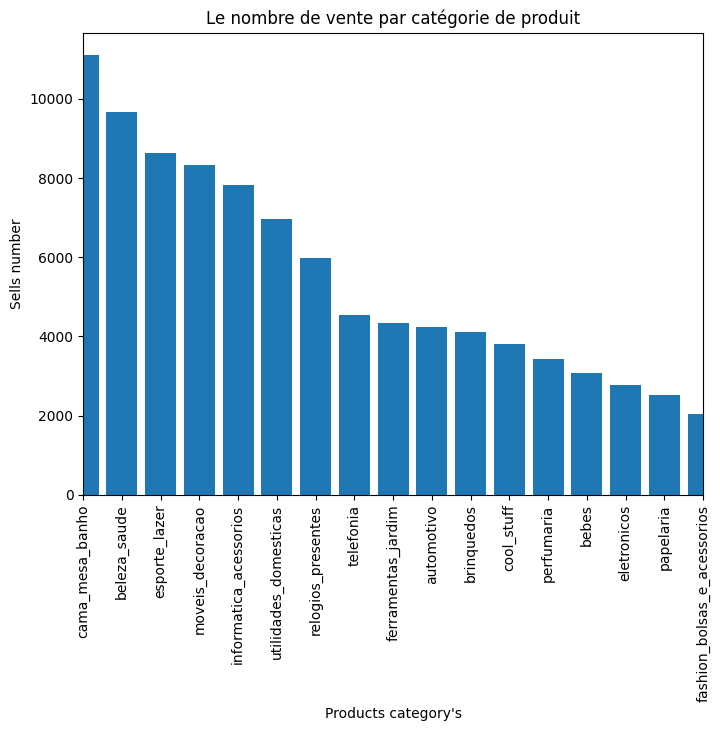

In [48]:
# Pour le rendre un peu plus lisible, je limite l'axe des x au catégories supérieur à 2000 ventes.
limite_inf_x = df1.loc[0, "product_category_name"]
limite_inf_y = df1.loc[16, "product_category_name"]

plt.figure(figsize=(8,6))
plt.bar(df1["product_category_name"],df1["count"])
plt.xticks(rotation='vertical')
plt.xlabel("Products category's")
plt.ylabel("Sells number")
plt.title("Le nombre de vente par catégorie de produit")
plt.xlim(limite_inf_x, limite_inf_y)

#### Création d'un histogramme pour comparer les **notes des reviews** pour chaque **categorie de produit**

In [50]:
# Multi Join pour lier les tables order_reviews et products
df2 = review_df.merge(orders_df, on="order_id", how="inner").merge(order_items_df, on="order_id", how="inner").merge(products_df, on="product_id", how="inner")
df2.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,timestamp_field_7,customer_id,order_status,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16T00:39:37Z,NaN,eecafc3ff695f031bfe354a9fff9d437,delivered,...,99.9,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
1,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16T00:39:37Z,NaN,eecafc3ff695f031bfe354a9fff9d437,delivered,...,99.9,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
2,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16T00:39:37Z,NaN,eecafc3ff695f031bfe354a9fff9d437,delivered,...,99.9,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
3,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16T00:39:37Z,NaN,eecafc3ff695f031bfe354a9fff9d437,delivered,...,119.0,4.40,cama_mesa_banho,30.0,568.0,1.0,900.0,17.0,22.0,17.0
4,9a0abbb668bafb95a6d2b05db43284c4,d7bd0e4afdf94846eb73642b4e3e75c3,3,NaN,NaN,2017-04-30 00:00:00,2017-05-03T00:02:22Z,NaN,12a063cae60cd7bc2f0029514b21d24c,delivered,...,22.9,14.61,pet_shop,50.0,365.0,3.0,300.0,24.0,12.0,12.0


In [64]:
reviews_mean_df = df2.groupby('product_category_name')['review_score'].mean().reset_index().sort_values(by="review_score", ascending=False)

reviews_mean_df

,product_category_name,review_score
0,automotivo,5.000000
10,ferramentas_jardim,5.000000
3,brinquedos,5.000000
15,telefonia,5.000000
5,casa_conforto,5.000000
14,relogios_presentes,5.000000
7,eletronicos,5.000000
11,informatica_acessorios,5.000000
9,esporte_lazer,4.333333
2,beleza_saude,4.250000


Text(0, 0.5, "Score's mean")

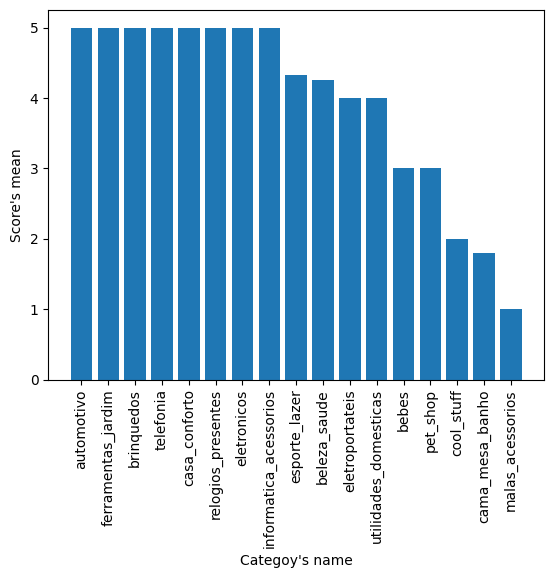

In [61]:
plt.figure()
plt.bar(reviews_mean_df['product_category_name'], reviews_mean_df['review_score'])
plt.xticks(rotation='vertical')
plt.xlabel("Categoy's name")
plt.ylabel("Score's mean")


#### La quantité de vente pour chaque trimestre et par année

In [112]:
# Regrouper les données pour chaque année 2016, 17 ,18. 

# passer la colonne order_purchase_timestamp en type datetime
type(orders_df['order_purchase_timestamp'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')

# On regroupe le dataframe pour chaque année
new_df = orders_df.groupby(orders_df['order_purchase_timestamp'].dt.year)
new_df

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 2) + inhomogeneous part.

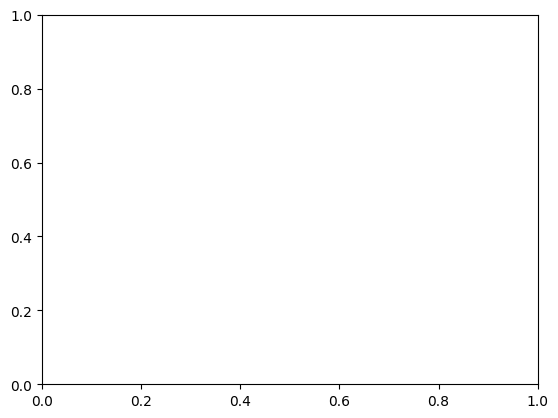

In [50]:
plt.figure()
plt.bar(new_df['order_purchase_timestamp'], new_df['order_id'])


### Nombre de paiement / type de paiment


In [31]:
payments_df.head()

count_by_type = payments_df['payment_type'].value_counts().reset_index()
count_by_type

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [34]:
#Supprimer la ligne not_defined pour nettoyer

# count_by_type= count_by_type.drop(4)
# count_by_type


# Le drop avec le numéro de l'index ne fonctionne pas car il n'est pas numérique. On passe par la bidouille ci-dessous

# count_by_type = count_by_type[count_by_type['payment_type'] != 'not_defined']
# count_by_type


count_by_type = count_by_type.drop(count_by_type.index[4])
count_by_type

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529


([<matplotlib.patches.Wedge at 0x278e32cb350>,
 [Text(-0.7510980480818666, 0.8036490043343613, 'credit_card'),
  Text(0.5567753326646969, -0.9486839457564972, 'boleto'),
  Text(1.0609873141752642, -0.29035481597376633, 'voucher'),
  Text(1.0988242621292097, -0.05084526483555683, 'debit_card')],
 [Text(-0.40968984440829087, 0.438354002364197, '74%'),
  Text(0.3036956359989255, -0.5174639704126347, '19%'),
  Text(0.5787203531865076, -0.1583753541675089, '6%'),
  Text(0.5993586884341143, -0.02773378081939463, '1%')])

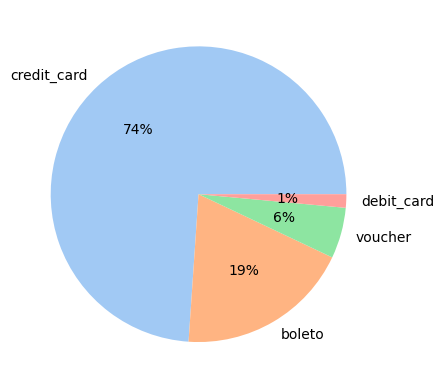

In [35]:
colors1 = sns.color_palette('pastel')[0:5]
plt.figure()
plt.pie(count_by_type['count'], labels= count_by_type['payment_type'], colors = colors1, autopct='%.0f%%')

### Création d'un **Scatter Plot** pour avoir un apperçu de la taille des produits

In [37]:
products_df.head()



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [53]:
df_4 = products_df.groupby('product_category_name')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False)
df_4


,product_category_name,product_id
13,cama_mesa_banho,3029
32,esporte_lazer,2867
54,moveis_decoracao,2657
11,beleza_saude,2444
72,utilidades_domesticas,2335
...,...,...
15,casa_conforto_2,5
37,fashion_roupa_infanto_juvenil,5
60,pc_gamer,3
67,seguros_e_servicos,2


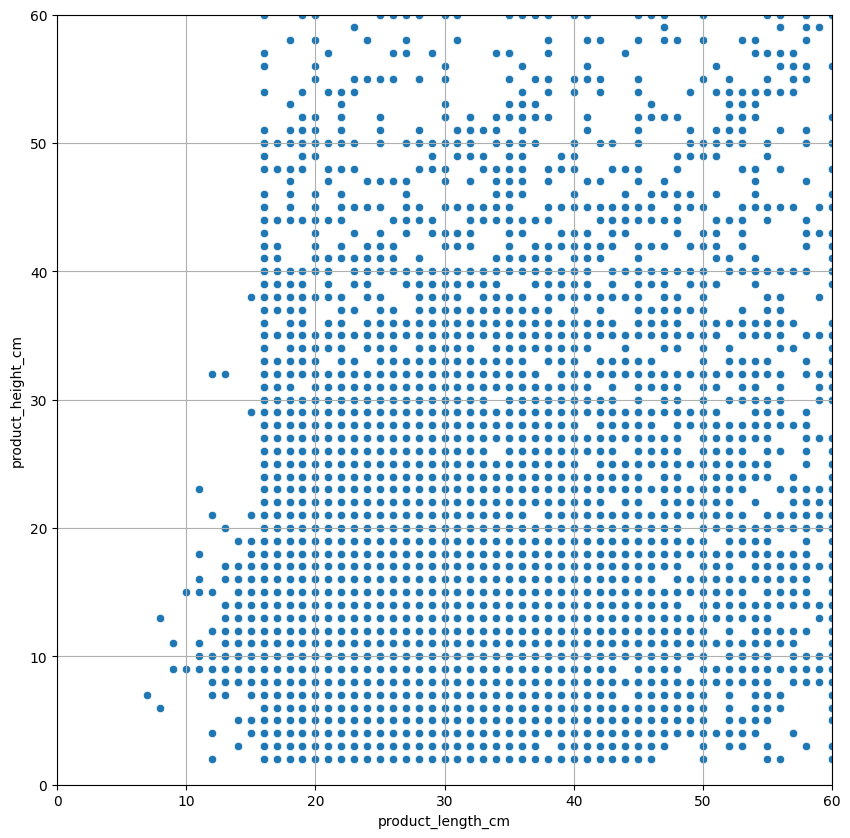

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='product_length_cm', y='product_height_cm',data=products_df)
plt.xlim(0,60)
plt.ylim(0,60)
plt.grid()

In [73]:
products_df1 = products_df[products_df['product_category_name'].isin(['cama_mesa_banho', 'esporte_lazer', 'moveis_decoracao'])]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0
13,7bb6f29c2be57716194f96496660c7c2,moveis_decoracao,51.0,2083.0,2.0,600.0,68.0,11.0,13.0
15,3bb7f144022e6732727d8d838a7b13b3,esporte_lazer,22.0,3021.0,1.0,800.0,16.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...
32942,16280ca280a86fee2ba3c928ed04439f,moveis_decoracao,64.0,236.0,11.0,2200.0,31.0,11.0,26.0
32944,1a14237ecc2fe3772b55c8d4e11ccb35,moveis_decoracao,58.0,1405.0,3.0,150.0,35.0,2.0,25.0
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0


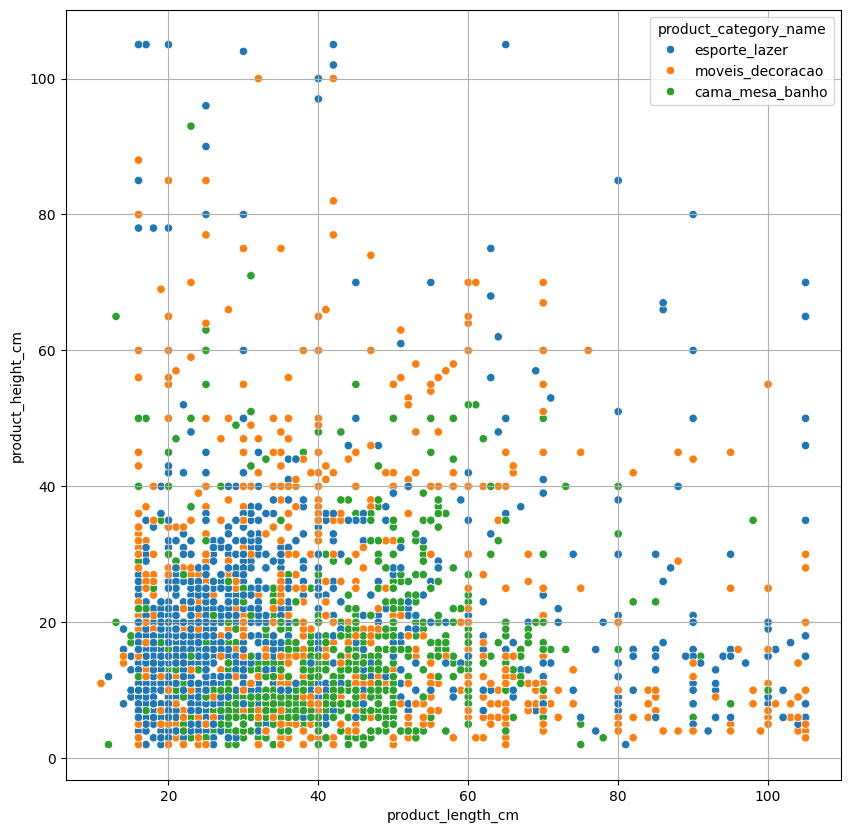

In [74]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='product_length_cm', y='product_height_cm',data=products_df1, hue="product_category_name")
# plt.xlim(0,60)
# plt.ylim(0,60)
plt.grid()

### Travaux sur la geolocalisation 

In [75]:
# 1ère étape, nettoyer la table geolocation pour éliminer les doublons, et garder d'une seule ligne par ZIPCODE. 


geolocation_df.info


<bound method DataFrame.info of          geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo          

In [76]:
geolocation_df_cleaned = geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'])
geolocation_df_cleaned.info

<bound method DataFrame.info of         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                              1037       -23.545621       -46.639292   
1                              1046       -23.546081       -46.644820   
3                              1041       -23.544392       -46.639499   
4                              1035       -23.541578       -46.641607   
5                              1012       -23.547762       -46.635361   
...                             ...              ...              ...   
999774                        99955       -28.107588       -52.144019   
999780                        99970       -28.345143       -51.876926   
999786                        99910       -27.863500       -52.084760   
999803                        99920       -27.858716       -52.300403   
999846                        99952       -28.160371       -51.936922   

            geolocation_city geolocation_state  
0                  sao paulo              

In [78]:
# Merge de la table Customers et geolocation nettoyée.
customers_geolocation_df = customers_df.merge(geolocation_df_cleaned, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
customers_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP


In [94]:
# Regroupement par zip_code afin de compter le nombre de commande dans chaque zipcode
customers_geolocation_df1 = customers_geolocation_df.groupby('customer_zip_code_prefix')['customer_unique_id'].count().reset_index().sort_values(by='customer_unique_id', ascending=False)
customers_geolocation_df1.head()

,customer_zip_code_prefix,customer_unique_id
5871,22790,142
6013,24220,124
5872,22793,121
6014,24230,117
5866,22775,110


In [89]:
# étape intermediaire pour comprendre si les customer_id sont relié à un unique order_id. 
true_false_doublon = orders_df['customer_id'].duplicated()
nbr_doublon = true_false_doublon.sum()
nbr_doublon

0

In [110]:
customers_geolocation_df2 = customers_geolocation_df1.merge(geolocation_df_cleaned, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
customers_geolocation_df2 = customers_geolocation_df2[customers_geolocation_df2['customer_unique_id'] >= 30]
customers_geolocation_df2.info

<bound method DataFrame.info of      customer_zip_code_prefix  customer_unique_id  \
0                       22790                 142   
1                       24220                 124   
2                       22793                 121   
3                       24230                 117   
4                       22775                 110   
..                        ...                 ...   
354                      7500                  30   
355                     31035                  30   
356                      5017                  30   
357                     14500                  30   
358                     88200                  30   

     geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                          22790       -23.011335       -43.450256   
1                          24220       -22.905817       -43.106989   
2                          22793       -23.009271       -43.429409   
3                          24230       -22.911270  

In [111]:
# Création d'une carte

import folium
from IPython.display import display # ligne pour afficher la carte directement dans le notebook

# Créer une carte centrée sur la première entrée du DataFrame
latitude_center = customers_geolocation_df2['geolocation_lat'].iloc[0]
longitude_center = customers_geolocation_df2['geolocation_lng'].iloc[0]
ma_carte = folium.Map(location=[latitude_center, longitude_center], zoom_start=6)


# Ajouter des marqueurs pour chaque point de latitude et longitude dans le DataFrame
# for index, row in customers_geolocation_df2.iterrows():
#     folium.Marker([row['geolocation_lat'], row['geolocation_lng']], popup=row['customer_zip_code_prefix']).add_to(ma_carte)


# Ajouter des marqueurs pour chaque point de latitude et longitude dans le DataFrame
for index, row in customers_geolocation_df2.iterrows():
    # Ajouter le nombre de clients ou de commandes au popup
    popup_text = f"Nombre de Client: {row['customer_unique_id']}"

    # Ajouter le marqueur avec le popup
    folium.Marker([row['geolocation_lat'], row['geolocation_lng']], popup=popup_text).add_to(ma_carte)

display(ma_carte)